# Tomatoes Disease Classification

In [ ]:
# Attack link to Kaggle dataset used
from IPython.display import HTML
HTML('<a href="https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf" target="_blank">Click here to access the Kaggle dataset</a>')


In [ ]:
# GPU check
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Nov 29 13:30:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Code for saving notebook
from IPython.display import display, Javascript

# Function to save the notebook
def save_notebook():
    display(Javascript("google.colab.saveNotebook();"))

# Set up a timer to save the notebook every 15 minutes
save_interval_minutes = 15
save_interval_milliseconds = save_interval_minutes * 60 * 1000

# Save the notebook initially
save_notebook()

# Set up an interval timer to save the notebook automatically
interval_code = f"setInterval(() => {save_notebook()}, {save_interval_milliseconds});"
display(Javascript(interval_code))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Installation
pip install tensorflow


In [ ]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Import all the Dependencies

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Set all the Constants

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

### Import data

In [ ]:
# Upload dataset to googlecolab
!pip install opendatasets
!pip install pandas


In [ ]:
import opendatasets as od

# Provide the Kaggle dataset URL
dataset_url = 'https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf'

# Download the dataset
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dungthuyvu
Your Kaggle Key: ··········


100%|██████████| 179M/179M [00:05<00:00, 35.2MB/s]


In [ ]:
# Some steps to locate data
import os

# List files in the '/content' directory
files_in_directory = os.listdir('/content')

# Print the list of files
print("Files in /content:", files_in_directory)

# ok.so it has been succesfully unzip

Files in /content: ['.config', 'tomatoleaf', 'sample_data']


In [ ]:
import os

# Specify the path to the dataset directory
dataset_path = '/content/tomatoleaf/'  # Adjust based on your dataset

# List files in the dataset directory
files = os.listdir(dataset_path)

# Print the list of files
print("Files in the dataset directory:", files)


Files in the dataset directory: ['tomato']


In [ ]:
import os

# Specify the path to the dataset directory
dataset_path = '/content/tomatoleaf/'  # Adjust based on your dataset

# List files in the "tomato" directory
tomato_directory_path = os.path.join(dataset_path, 'tomato')
files_in_tomato_directory = os.listdir(tomato_directory_path)

# Print the list of files in the "tomato" directory
print("Files in the 'tomato' directory:", files_in_tomato_directory)


Files in the 'tomato' directory: ['val', 'cnn_train.py', 'train']


In [ ]:
import os

# Specify the path to the dataset directory
dataset_path = '/content/tomatoleaf/'  # Adjust based on your dataset

# List files in the 'tomato/val' directory
val_directory_path = os.path.join(dataset_path, 'tomato', 'val')
files_in_val_directory = os.listdir(val_directory_path)

# List files in the 'tomato/train' directory
train_directory_path = os.path.join(dataset_path, 'tomato', 'train')
files_in_train_directory = os.listdir(train_directory_path)

# Print the lists of files in the 'val' and 'train' directories
print("Files in the 'val' directory:", files_in_val_directory)
print("Files in the 'train' directory:", files_in_train_directory)


Files in the 'val' directory: ['Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot']
Files in the 'train' directory: ['Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot']


In [ ]:
# Specify the path to the 'train' directory
train_dir = '/content/tomatoleaf/tomato/train'
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 10000 files belonging to 10 classes.


In [ ]:
# Examine classname
class_names = dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
#Exploration of data
for image_batch, labels_batch in dataset.take(2):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[5 0 0 2 3 6 6 4 6 4 0 3 4 0 1 5 7 5 2 8 3 6 8 3 2 4 0 7 8 6 1 5]
(32, 256, 256, 3)
[5 2 2 6 2 4 9 3 5 0 5 8 3 3 3 3 6 6 0 6 0 6 0 3 2 5 4 8 5 2 3 0]


So the data has been divided into 32 batchs.The code is for printing class of 32 images in each batches.The size of images is 256-256 pixels


### Visualize some of the images from our dataset

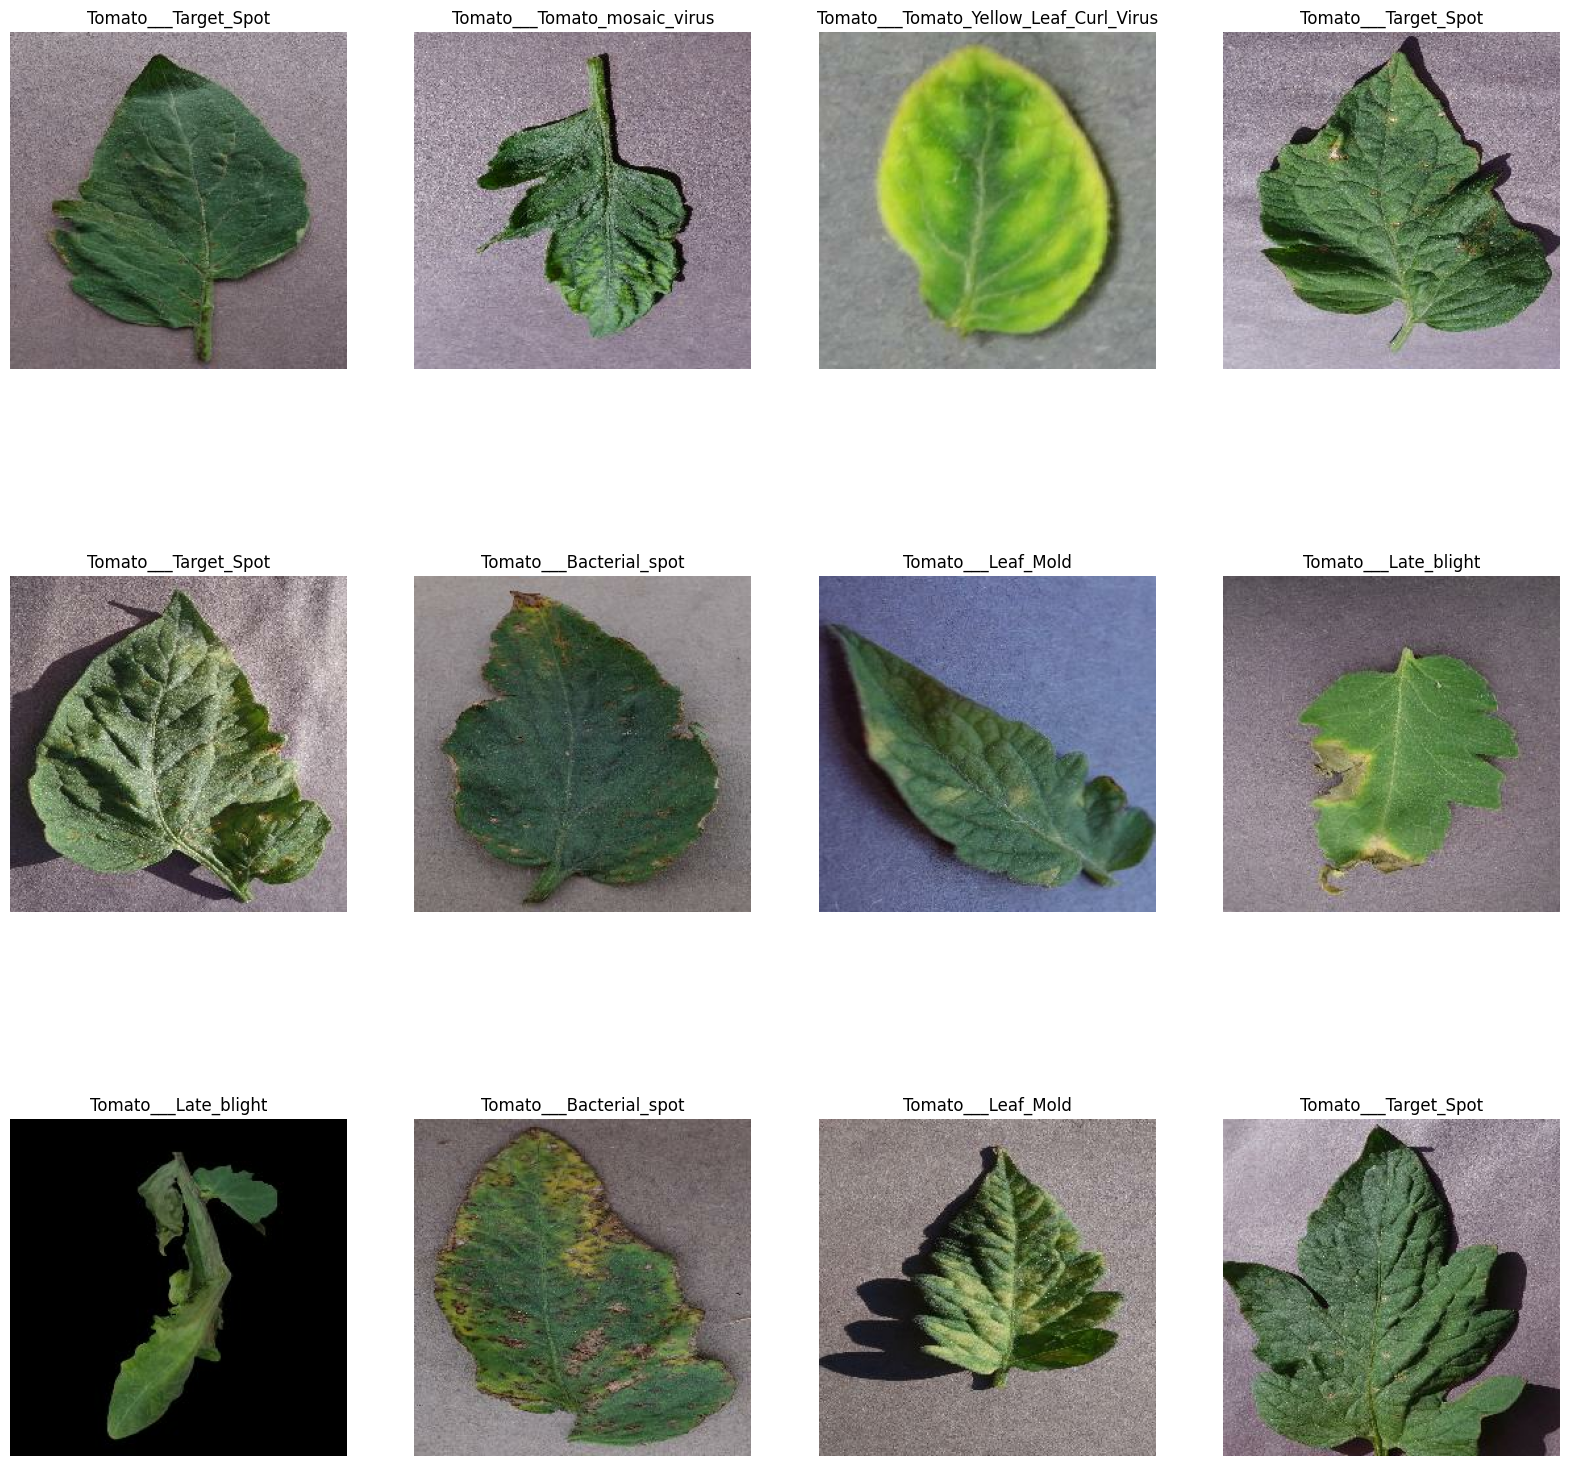

In [ ]:
plt.figure(figsize=(20, 20))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

>The data is visualized for the batch number 1 with the according name of disease!


## How to divided data sources for modelling

Dataset should be divided into 3 subsets which are:
1. Training: Dataset to be used while training
2. Validation: Dataset to be tested against while training to help preventing overfitting and bias
3. Test: Dataset to be tested against after we trained a model

In [ ]:
len(dataset)# is that because data has been fetched into batch : 313*32 approximatelly 10000

313

In [ ]:
train_size = 0.6 # 80% data is for trainning
len(dataset)*train_size

187.79999999999998

In [ ]:
train_ds = dataset.take(250)# take only 20 first elements of dataset for testing and debuf method.
len(train_ds)

250

In [ ]:
test_ds = dataset.skip(250)
len(test_ds)

63

In [ ]:
val_size=0.1
len(dataset)*val_size

31.3

In [ ]:
val_ds = test_ds.take(31)
len(val_ds)

31

In [ ]:
test_ds = test_ds.skip(31)
len(test_ds)

32

In [ ]:
#Creating function to divide dataset int train,validation and test set
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=123)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

250

In [ ]:
len(val_ds)

31

In [ ]:
len(test_ds)

32

### Data processing when creating train,test dataset : Cache, Shuffle, and Prefetch the Dataset

###Cache:

Purpose: Caches elements of the dataset in memory, improving data loading speed.
Why: Reduces the time spent reading data from disk by storing elements in memory after they are loaded for the first time.
How: After an element is loaded from the dataset, it is cached in memory. Subsequent iterations can then use the cached data instead of reloading from the original data source.
###Shuffle:
Purpose: Randomizes the order of examples in the dataset.
Why: Prevents the model from learning patterns based on the order of the data
How: The dataset is shuffled so that the model sees the examples in a different order.
###Prefetch:
Purpose: Overlaps data loading and model execution.
Why: Reduces training time
How: During training, while the model is processing one batch, the input pipeline is preparing the next batch in parallel.

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

The size of the whole dataset is 10000 so that we chose the number of shuffle is 1000

## Classification Model

### Data Processing before fectching into Neural Network:
First step: Resizing Images:adjust t o a consistent size that is suitable for model,ensuring that all images has same dimensions.In this case,set to 256*256
Steps 2: Normalization by divided by 256 so the values are in range (0,1). Images have pixal value in range(0,255).This helps to in stabilizing and accelerating the training process, avoiding numerical instability.
Steps 3: Handling Predictions in Inference:

The model should be able to handle images of different sizes during inference even all the original data in dataset are already at size (256,256).The resizing layer becomes useful at inference time when someone supplies an image with dimensions other than (256, 256). The layer will resize the input image to the expected size before passing it through the rest of the model.

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

### Data Augmentation


Why? Data Augmentation is generated for enhancing the accuracy of model. Besides, it is Better at Handling of Invariances. Data augmentation allows the model to learn these invariances by exposing it to transformed versions of the input data.

In [ ]:
# we try with rotation and flipping first.
#data_augmentation = tf.keras.Sequential([
  #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  #layers.experimental.preprocessing.RandomRotation(0.2),
#])

In [ ]:
# Using 5 commons techniques
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.4),
  layers.experimental.preprocessing.RandomZoom(0.4),
  layers.experimental.preprocessing.RandomContrast(0.4),
  layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
])


#### Applying Data Augmentation to Train Dataset

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



### Model Architecture
CNN has been used. The initial layers is for resizing, normalization and data augmentation as said above.
The final layers will be flattened and be applied Softmax activation function.


In [ ]:
# Limit GPU memory usage
gpus = tf.config.experimental.list_physical_devices('GPU')


In [ ]:
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    except RuntimeError as e:
        print(e)


Virtual devices cannot be modified after being initialized


In [ ]:
from tensorflow.keras.mixed_precision import Policy, set_global_policy

# Set mixed precision policy
policy = Policy('mixed_float16')
set_global_policy(policy)

In [ ]:
from tensorflow.keras.mixed_precision import Policy, set_global_policy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set mixed precision policy
policy = Policy('mixed_float16')
set_global_policy(policy)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization

In [ ]:
# Building model 1:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

initializer = tf.keras.initializers.GlorotUniform(seed=42)
from tensorflow.keras import models, layers
model_1 = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_1.build(input_shape=input_shape)

In [ ]:
# Building model 2
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout , BatchNormalization
# In this code, We tried to add drop out with the ratio of 0.3
from tensorflow.keras import layers, models
model_2 = models.Sequential([
    resize_and_rescale,

    # Convolutional layers with padding and batch normalization
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='valid'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='valid'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='valid'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='valid'),
    layers.BatchNormalization(),

    # Global Average Pooling layer
    layers.GlobalAveragePooling2D(),

    # Dense layers with dropout and L2 regularization
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(n_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01)),
])

model_2.build(input_shape=input_shape)



In [ ]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d_24 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (32, 60, 60, 64)         

In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 256, 256, 32)        896       
                                                                 
 batch_normalization (Batch  (32, 256, 256, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 128, 128, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 128, 128, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (32, 128, 128, 64)       

### Compiling the Model
Optimizer function : Adam

 `SparseCategoricalCrossentropy` for losses

 `accuracy` as a metric for accesing accuracy and model performance

In [ ]:
model_1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
#model_2.compile(
    #optimizer='adam',
    #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    #metrics=['accuracy']
#)

In [ ]:
# Compile model 2 using learing rate adjustment
from tensorflow.keras.optimizers import schedules

initial_learning_rate = 0.001
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_2.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
# Installation of Early Stopping
from keras.callbacks import EarlyStopping
calls = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 20,# stop if not improve for 20 consecutive epochs
                   verbose = 1,
                   restore_best_weights = True)# model weights are reverted to the ones that gave the best monitored quantity value during training.




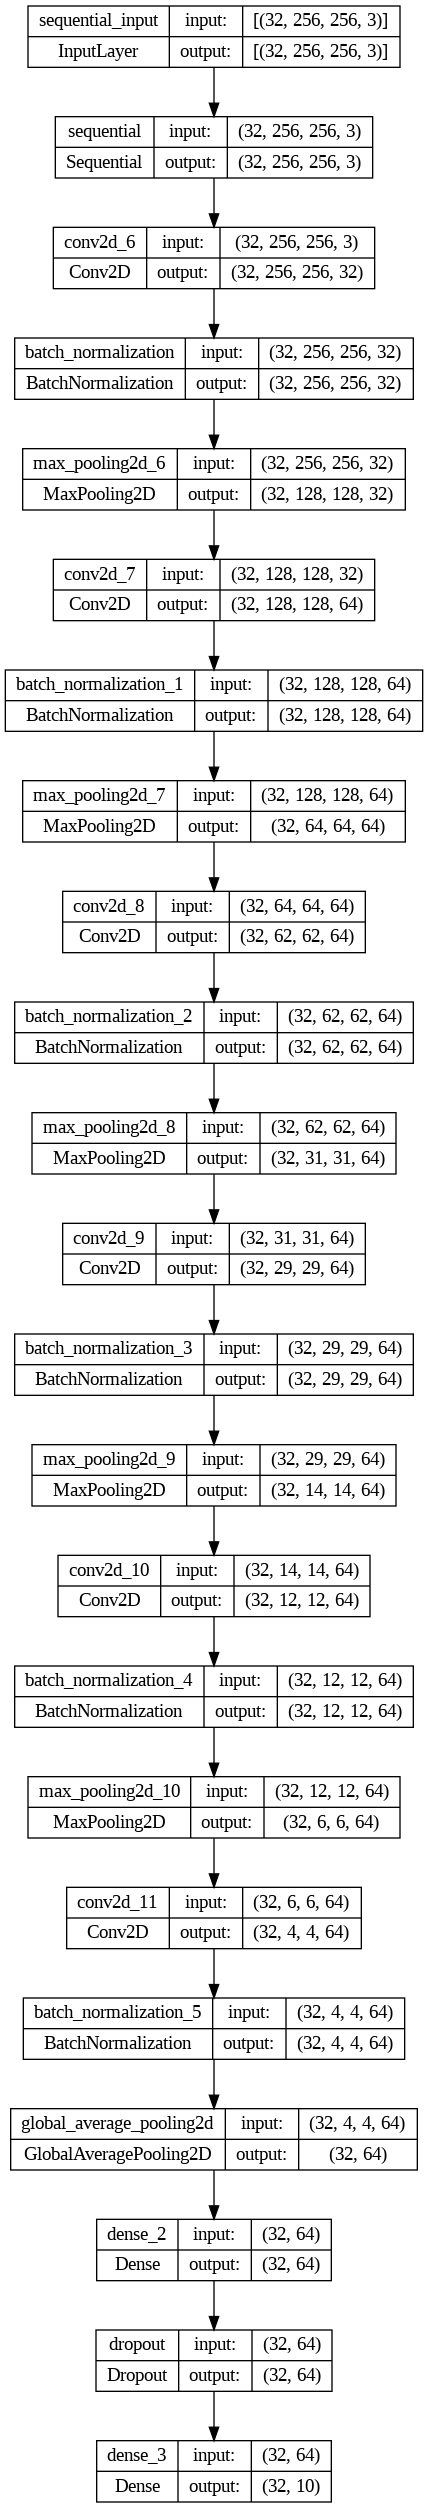

In [ ]:
# Structural visulization of Model 2
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes=True, to_file='model_1_plot.png')


In [ ]:
# Calling and storing accuracy and loss of model 1
history_1 = model_1.fit(
   train_ds,
   batch_size=BATCH_SIZE,
   validation_data=val_ds,
   verbose=1,
   epochs=50,
)

Epoch 1/50
250/250 [==============================] - 185s 668ms/step - loss: 2.1901 - accuracy: 0.1766 - val_loss: 2.0146 - val_accuracy: 0.2369
Epoch 2/50
250/250 [==============================] - 164s 654ms/step - loss: 1.9382 - accuracy: 0.2882 - val_loss: 2.0467 - val_accuracy: 0.2722
Epoch 3/50
250/250 [==============================] - 164s 657ms/step - loss: 1.8137 - accuracy: 0.3442 - val_loss: 1.9328 - val_accuracy: 0.2762
Epoch 4/50
250/250 [==============================] - 162s 648ms/step - loss: 1.6272 - accuracy: 0.4163 - val_loss: 1.6853 - val_accuracy: 0.3921
Epoch 5/50
250/250 [==============================] - 161s 643ms/step - loss: 1.3412 - accuracy: 0.5252 - val_loss: 1.4953 - val_accuracy: 0.4960
Epoch 6/50
250/250 [==============================] - 161s 643ms/step - loss: 1.1632 - accuracy: 0.5859 - val_loss: 1.1370 - val_accuracy: 0.6119
Epoch 7/50
250/250 [==============================] - 162s 650ms/step - loss: 1.0340 - accuracy: 0.6349 - val_loss: 1.5148 -

In [ ]:
# Calling and storing accuracy and loss of model 2
history_2= model_2.fit(train_ds,
                    callbacks = [calls],
                    steps_per_epoch = 8000/32,
                    epochs = 50,
                    batch_size=BATCH_SIZE,
                    validation_steps = 1000/32,
                    validation_data = val_ds)


Epoch 1/50
250/250 [==============================] - 170s 680ms/step - loss: 1.0759 - accuracy: 0.7417 - val_loss: 1.9240 - val_accuracy: 0.4567
Epoch 2/50
250/250 [==============================] - 169s 676ms/step - loss: 0.9230 - accuracy: 0.7779 - val_loss: 2.0948 - val_accuracy: 0.4869
Epoch 3/50
250/250 [==============================] - 169s 675ms/step - loss: 0.8389 - accuracy: 0.7983 - val_loss: 2.0391 - val_accuracy: 0.5091
Epoch 4/50
250/250 [==============================] - 168s 670ms/step - loss: 0.7537 - accuracy: 0.8210 - val_loss: 1.5080 - val_accuracy: 0.6058
Epoch 5/50
250/250 [==============================] - 168s 671ms/step - loss: 0.6968 - accuracy: 0.8352 - val_loss: 1.3083 - val_accuracy: 0.6361
Epoch 6/50
250/250 [==============================] - 167s 668ms/step - loss: 0.6355 - accuracy: 0.8561 - val_loss: 1.0506 - val_accuracy: 0.6905
Epoch 7/50
250/250 [==============================] - 168s 670ms/step - loss: 0.5873 - accuracy: 0.8704 - val_loss: 2.9079 -

In [ ]:
print(val_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
scores_1 = model_1.evaluate(test_ds)

32/32 [==============================] - 1s 16ms/step - loss: 0.1497 - accuracy: 0.9512


In [ ]:
scores_1# this is list containing of losses and accuracy value

[0.2321028709411621, 0.9326171875]

### Plotting the Accuracy and Loss Curves

In [ ]:
history_1

In [ ]:
history_1.params

{'verbose': 1, 'epochs': 1, 'steps': 250}

In [ ]:
history_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [ ]:
type(history_1.history['loss'])

list

In [ ]:
len(history_1.history['loss'])

50

In [ ]:
history_1.history['loss'][:10] # show loss for first 10 epochs

[0.13088203966617584]

In [ ]:
acc_1 = history_1.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']

loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

In [ ]:
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']

loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

In [ ]:
# Plotting of learning curve for model 1
EPOCHS = 50
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc_1, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss_1, label='Training Loss')
plt.plot(range(EPOCHS), val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

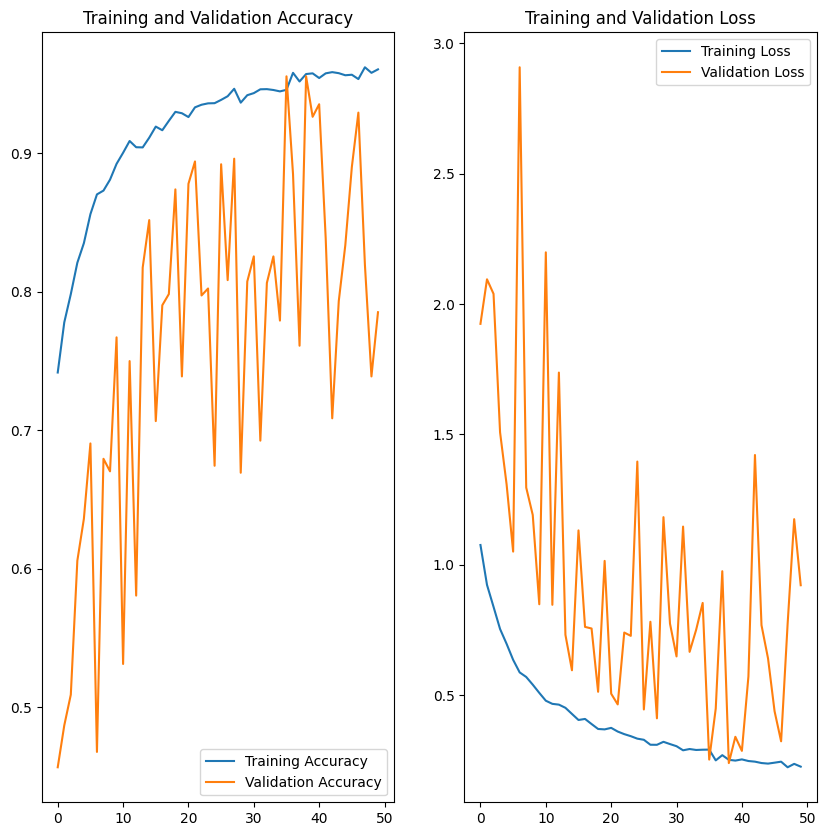

In [ ]:
# Plotting learning curve for model 2
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc_2, label='Training Accuracy')
plt.plot(range(50), val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss_2, label='Training Loss')
plt.plot(range(50), val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Tomato___Leaf_Mold
1/1 [==============================] - 0s 148ms/step
predicted label: Tomato___Spider_mites Two-spotted_spider_mite


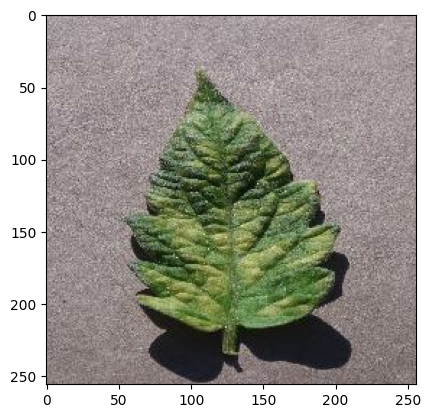

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction_1 = model_1.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction_1[0])])

### Write a function for inference

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 17ms/step


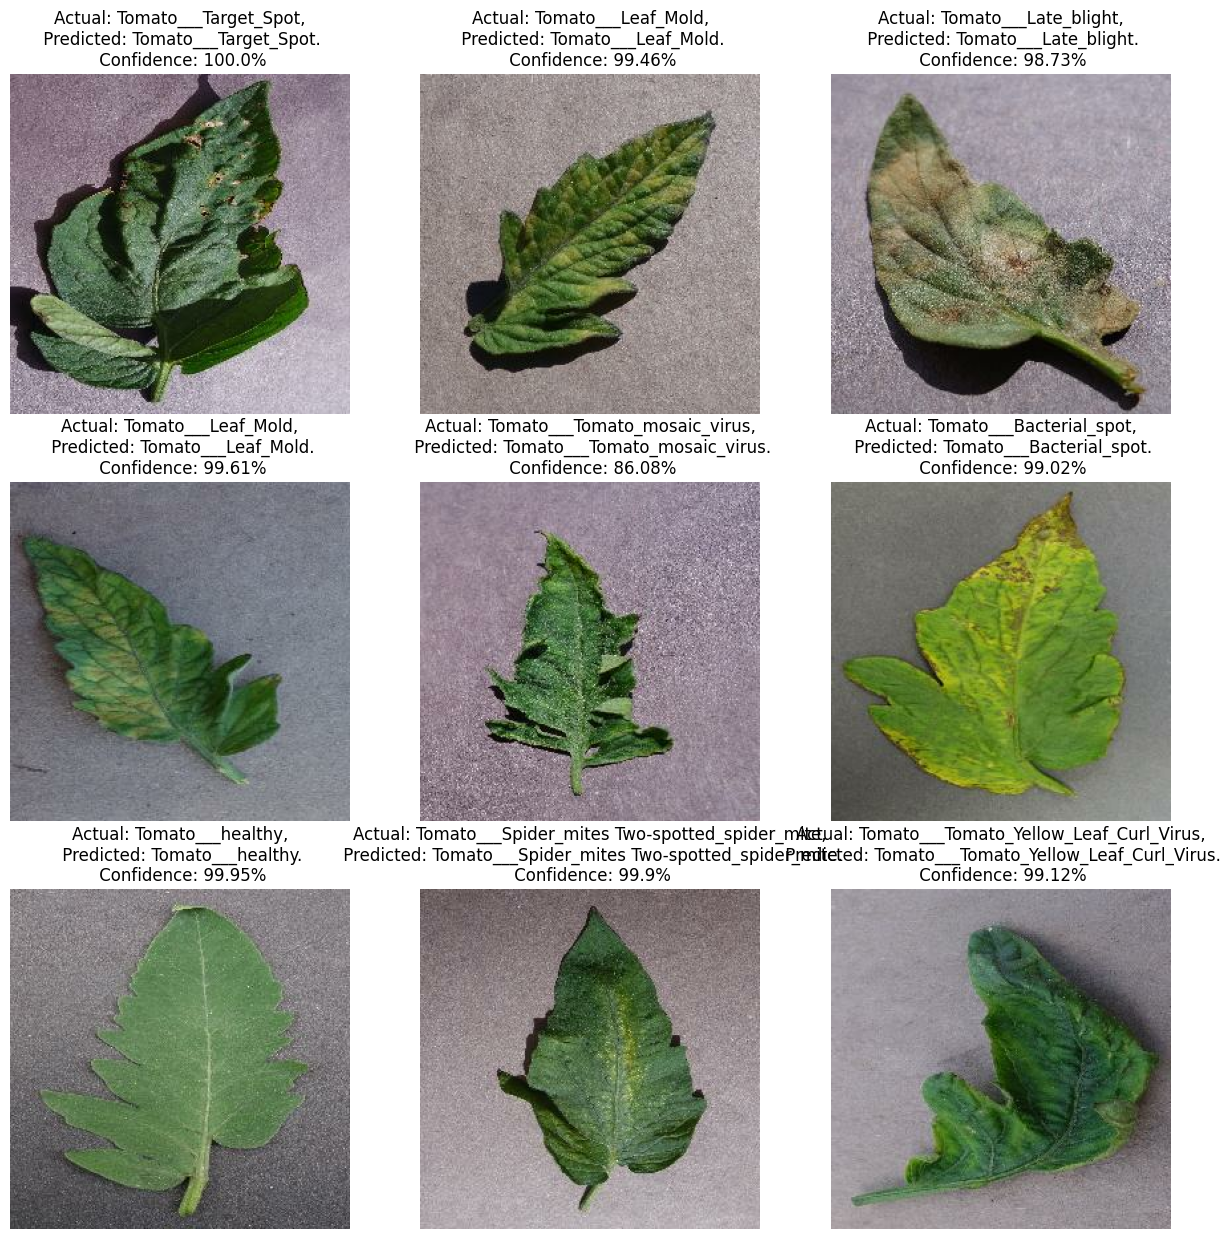

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model_1, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

1/1 [==============================] - 0s 18ms/step
Precision for model 2: 0.9072
Recall for model 2: 0.8750


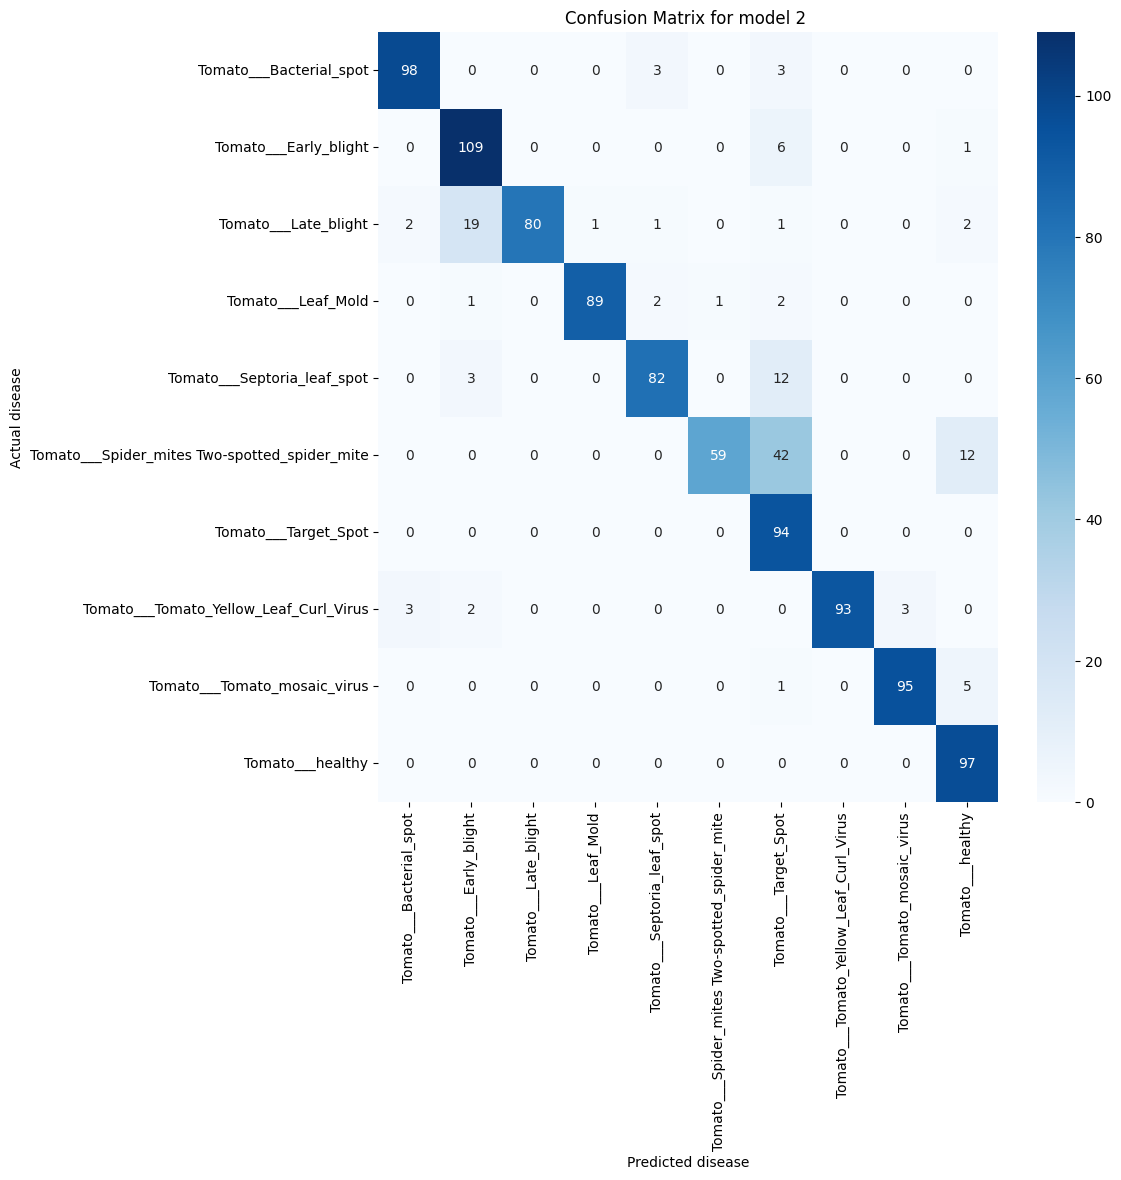

In [ ]:
# Model performance assessment using Confusion matrix, Preciosn, and recall
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
def predict_and_evaluate(model, test_ds, class_names):
    predicted_labels = []
    true_labels = []

    for images, labels in test_ds:
        for i in range(len(labels)):
            img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
            img_array = tf.expand_dims(img_array, 0)

            predictions = model.predict(img_array)

            predicted_class = class_names[np.argmax(predictions[0])]
            confidence = np.max(predictions[0])
            predicted_labels.append(predicted_class)
            true_labels.append(class_names[labels[i]])

    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels, labels=class_names)
    # Calculate precision and recall scores
    precision = precision_score(true_labels, predicted_labels, labels=class_names, average='weighted')
    recall = recall_score(true_labels, predicted_labels, labels=class_names, average='weighted')

    # Print precision and recall scores
    print(f'Precision for model 2: {precision:.4f}')
    print(f'Recall for model 2: {recall:.4f}')
    # Plot confusion matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted disease')
    plt.ylabel('Actual disease')
    plt.title('Confusion Matrix for model 2 ')
    plt.show()
class_names = dataset.class_names
# Call the function with your model and test dataset
predict_and_evaluate(model_2, test_ds, class_names)


In [ ]:
#Test accurracy through 65 epochs for model 1
import numpy as np
import matplotlib.pyplot as plt
test_accuracy_history = []
epochs = 65
for epoch in range(epochs):
    history_1 = model_1.fit(
        train_ds,
        batch_size=BATCH_SIZE,
        validation_data=val_ds,
        verbose=1,
        epochs=1,
    )


    test_loss, test_accuracy = model_1.evaluate(test_ds)
    print(f'Epoch {epoch + 1}/{epochs} - Test Accuracy: {test_accuracy * 100:.2f}%')

    test_accuracy_history.append(test_accuracy)


In [ ]:
# Calculate the mean test accuracy for model 1
mean_test_accuracy_1 = np.mean(test_accuracy_history)
print(f'Mean Test Accuracy for model 1 over {epochs} epochs: {mean_test_accuracy_1 * 100:.2f}%')

Mean Test Accuracy for model 1 over 65 epochs: 89.85%


In [ ]:
#Test accuracy through 65 epochs of model 2
test_accuracy_history_2 = []
epochs = 65
for epoch in range(epochs):
    history_2 = model_2.fit(
        train_ds,
        batch_size=BATCH_SIZE,
        validation_data=val_ds,
        verbose=1,
        epochs=1,
    )


    test_loss_2, test_accuracy_2 = model_2.evaluate(test_ds)
    print(f'Epoch {epoch + 1}/{epochs} - Test Accuracy: {test_accuracy_2 * 100:.2f}%')

    test_accuracy_history_2.append(test_accuracy_2)

32/32 [==============================] - 1s 17ms/step - loss: 0.3690 - accuracy: 0.9053
Epoch 1/65 - Test Accuracy: 90.53%
32/32 [==============================] - 1s 17ms/step - loss: 0.3322 - accuracy: 0.9170
Epoch 2/65 - Test Accuracy: 91.70%
32/32 [==============================] - 1s 17ms/step - loss: 0.4456 - accuracy: 0.8848
Epoch 3/65 - Test Accuracy: 88.48%
32/32 [==============================] - 1s 17ms/step - loss: 0.4260 - accuracy: 0.9033
Epoch 4/65 - Test Accuracy: 90.33%
32/32 [==============================] - 1s 17ms/step - loss: 0.8169 - accuracy: 0.8096
Epoch 5/65 - Test Accuracy: 80.96%
32/32 [==============================] - 1s 17ms/step - loss: 0.3684 - accuracy: 0.9131
Epoch 6/65 - Test Accuracy: 91.31%
32/32 [==============================] - 1s 17ms/step - loss: 0.5038 - accuracy: 0.8818
Epoch 7/65 - Test Accuracy: 88.18%
32/32 [==============================] - 1s 17ms/step - loss: 0.6595 - accuracy: 0.8467
Epoch 8/65 - Test Accuracy: 84.67%
32/32 [=========

In [ ]:
# Calculate the mean test accuracy for model 2:
mean_test_accuracy_2 = np.mean(test_accuracy_2)
print(f'Mean Test Accuracy for model 2 over {epochs} epochs: {mean_test_accuracy_2 * 100:.2f}%')

Mean Test Accuracy for model 2 over 65 epochs: 93.75%


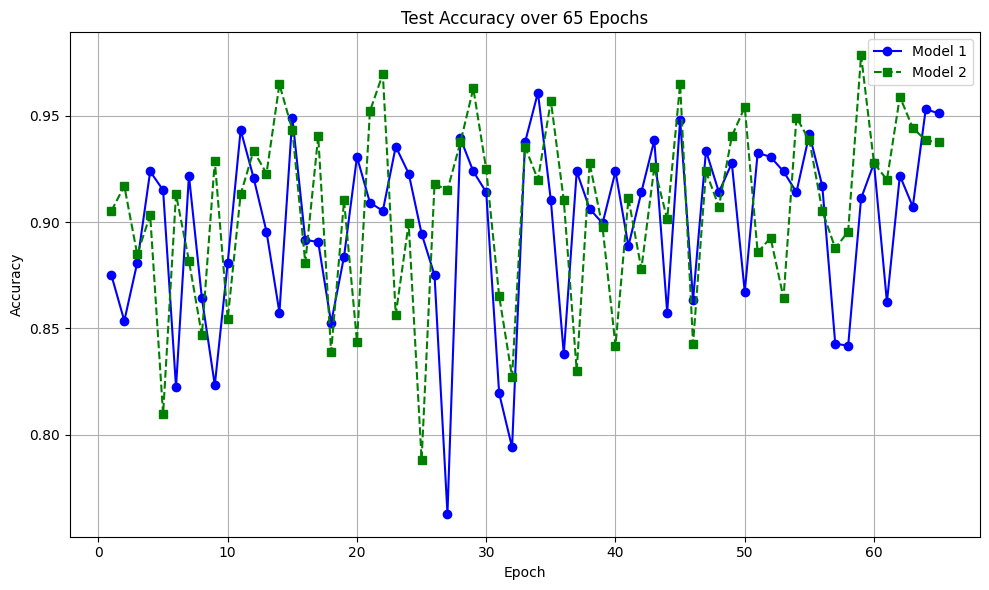

In [ ]:
# Plot the test accuracy over epochs for 2 models and comparision
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), test_accuracy_history, label='Model 1', marker='o', linestyle='-', color='blue')
plt.plot(range(1, epochs + 1), test_accuracy_history_2, label='Model 2', marker='s', linestyle='--', color='green')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over 65 Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

After model creation with 65 epochs,we realized that the early stopping should be conducted with the decrease value of patience from 20 to 10 to 5 .


In [ ]:
# Changing the patience parameter to 5
from keras.callbacks import EarlyStopping
calls_2 = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 3,# stop if not improve for 3 consecutive epochs
                   verbose = 1,
                   restore_best_weights = True)


In [ ]:
import numpy as np

In [ ]:
#Test accuracy using Early stopping
test_accuracy_history_2 = []
epochs = 65
for epoch in range(epochs):
    history_2 = model_2.fit(
        train_ds,
        batch_size=BATCH_SIZE,
        validation_data=val_ds,
        verbose=1,
        epochs=1,
        callbacks=[calls_2]  # Add the EarlyStopping callback
    )

    test_loss_2, test_accuracy_2 = model_2.evaluate(test_ds)
    print(f'Epoch {epoch + 1}/{epochs} - Test Accuracy: {test_accuracy_2 * 100:.2f}%')

    test_accuracy_history_2.append(test_accuracy_2)

    if calls_2.stopped_epoch > 0:
        print(f"Early stopping at epoch {epoch + 1} due to no improvement in validation accuracy.")
        break  # Break the loop if early stopping criteria met

# Calculate the mean test accuracy
mean_test_accuracy_2 = np.mean(test_accuracy_history_2)
print(f'Mean Test Accuracy over {epoch + 1} epochs: {mean_test_accuracy_2 * 100:.2f}%')


32/32 [==============================] - 1s 26ms/step - loss: 0.2328 - accuracy: 0.9521
Epoch 1/65 - Test Accuracy: 95.21%
32/32 [==============================] - 1s 26ms/step - loss: 0.6726 - accuracy: 0.8379
Epoch 2/65 - Test Accuracy: 83.79%
32/32 [==============================] - 1s 26ms/step - loss: 0.2950 - accuracy: 0.9404
Epoch 3/65 - Test Accuracy: 94.04%
32/32 [==============================] - 1s 26ms/step - loss: 0.3857 - accuracy: 0.9023
Epoch 4/65 - Test Accuracy: 90.23%
32/32 [==============================] - 1s 26ms/step - loss: 0.3097 - accuracy: 0.9316
Epoch 5/65 - Test Accuracy: 93.16%
32/32 [==============================] - 1s 26ms/step - loss: 0.3765 - accuracy: 0.8936
Epoch 6/65 - Test Accuracy: 89.36%
32/32 [==============================] - 1s 26ms/step - loss: 0.3822 - accuracy: 0.8965
Epoch 7/65 - Test Accuracy: 89.65%
32/32 [==============================] - 1s 26ms/step - loss: 0.2637 - accuracy: 0.9365
Epoch 8/65 - Test Accuracy: 93.65%
32/32 [=========

## Save model

In [ ]:
#import os
#model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
#model.save(f"../models/{model_version}")

In [ ]:
#model.save("../tomatoes.h5")

In [ ]:
#save the files :
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp -r /content/tomatoleaf /content/drive/My\ Drive/



In [ ]:
!ls /content/drive/My\ Drive/
